# **Task-01**

## Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv("D:\\Github\\PRODIGY_DS_01\\dataset\\data.csv")

In [29]:
# df.info()
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0


In [30]:
df.isna().sum()
# df.isna().value_counts()
df.dropna(inplace=True)
df.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2020              0
2021              0
2022              0
2023              0
2024              0
Length: 69, dtype: int64

In [31]:
exclude_keywords=[
    "World", "income", "Asia", "Africa", "Europe",
    "dividend", "countries", "IDA", "IBRD",
    "OECD", "total", "classified", "Caribbean",
    "Pacific","Arab","Sub-Saharan","North America",
    "South Asia","Middle East",'Fragile','EURO'
]
filtered_df=df[
    ~df["Country Name"].str.contains("|".join(exclude_keywords),case=False,na=False)
]
df=filtered_df

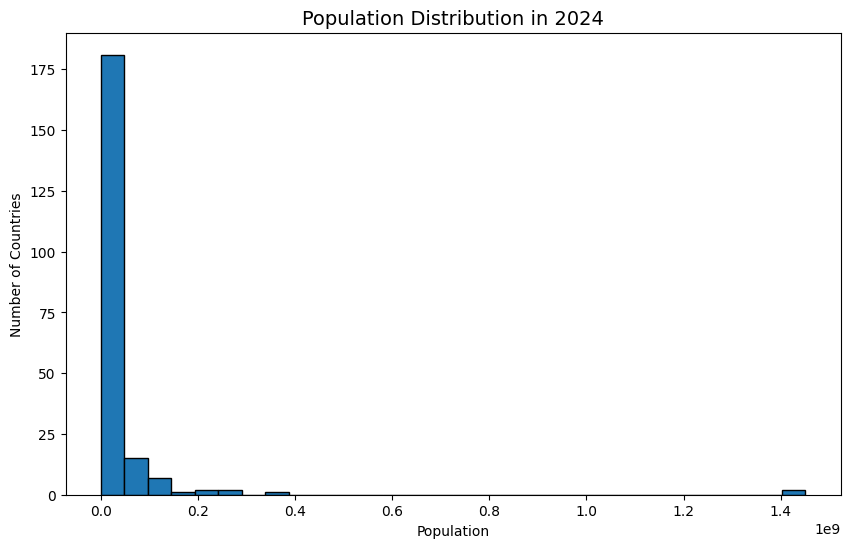

In [32]:
year='2024'
data_2024=df[year].dropna()
plt.figure(figsize=((10,6)))
plt.hist(data_2024,bins=30,edgecolor='black')
plt.title(f"Population Distribution in {year}", fontsize=14)
plt.xlabel("Population")
plt.ylabel("Number of Countries")
plt.show()

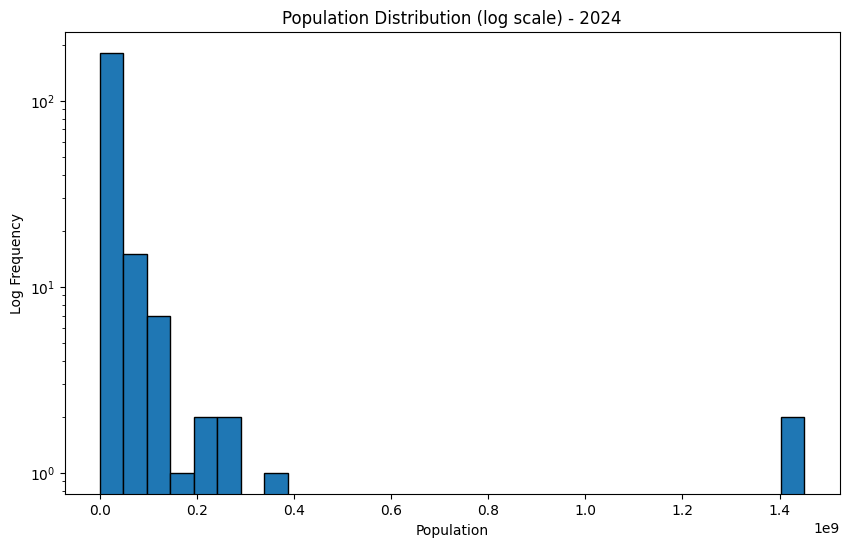

In [33]:
plt.figure(figsize=(10,6))
plt.hist(data_2024,bins=30,edgecolor='black')
plt.yscale('log')
plt.title('Population Distribution (log scale) - 2024')
plt.xlabel('Population')
plt.ylabel('Log Frequency')
plt.show()

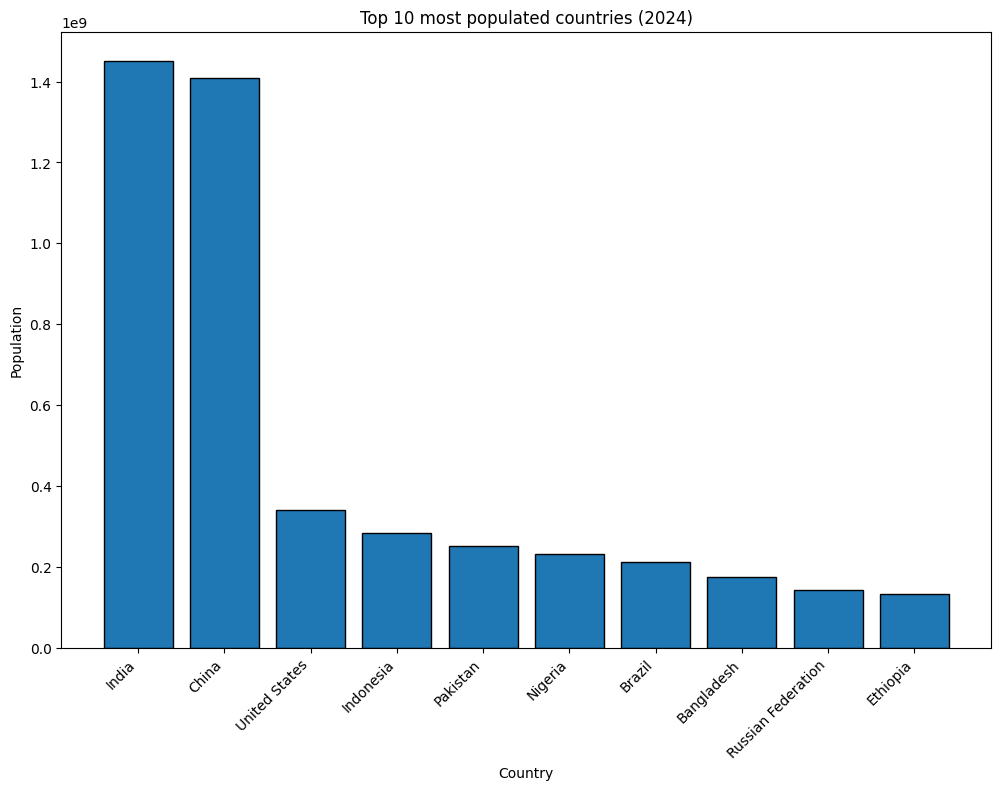

In [34]:
top10_by_population=filtered_df.sort_values(by=year,ascending=False).head(10)
plt.figure(figsize=((12,8)))
plt.bar(top10_by_population['Country Name'],top10_by_population['2024'],edgecolor='black')
plt.title('Top 10 most populated countries (2024)')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45,ha='right')
plt.show()

Text(0.5, 1.0, 'Contribution of Top  10 Countries to Global Population (2024)')

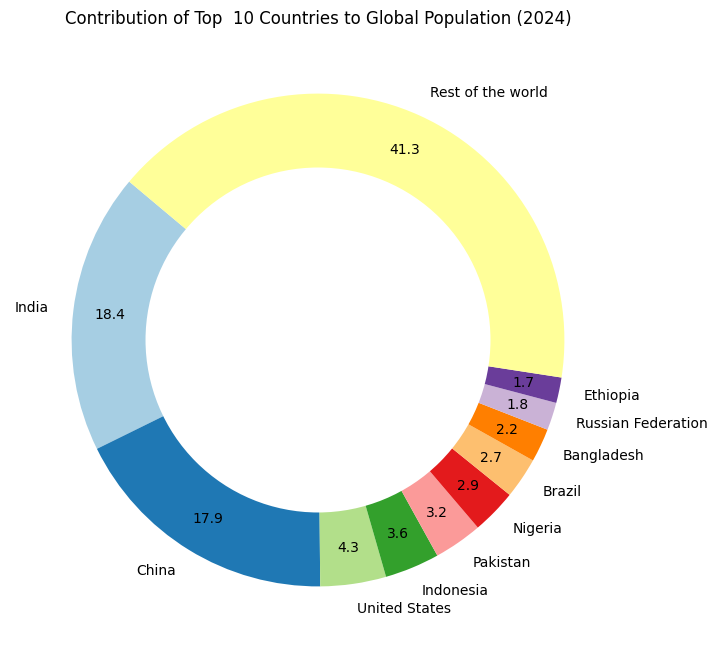

In [56]:
total_pop_2024=df['2024'].sum()
top10_2024=df.nlargest(10,'2024')[['Country Name','2024']]
top10_2024['Percentage']=(top10_2024['2024']/total_pop_2024)*100

labels=top10_2024['Country Name']
size=top10_2024['Percentage']
others_percent=100-size.sum()
labels=list(labels)+['Rest of the world']
size=list(size)+[others_percent]

plt.figure(figsize=(8,8))
plt.pie(size, labels=labels,autopct='%1.1f', startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)
centre_circle=plt.Circle((0,0),0.70, fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Contribution of Top  10 Countries to Global Population (2024)')


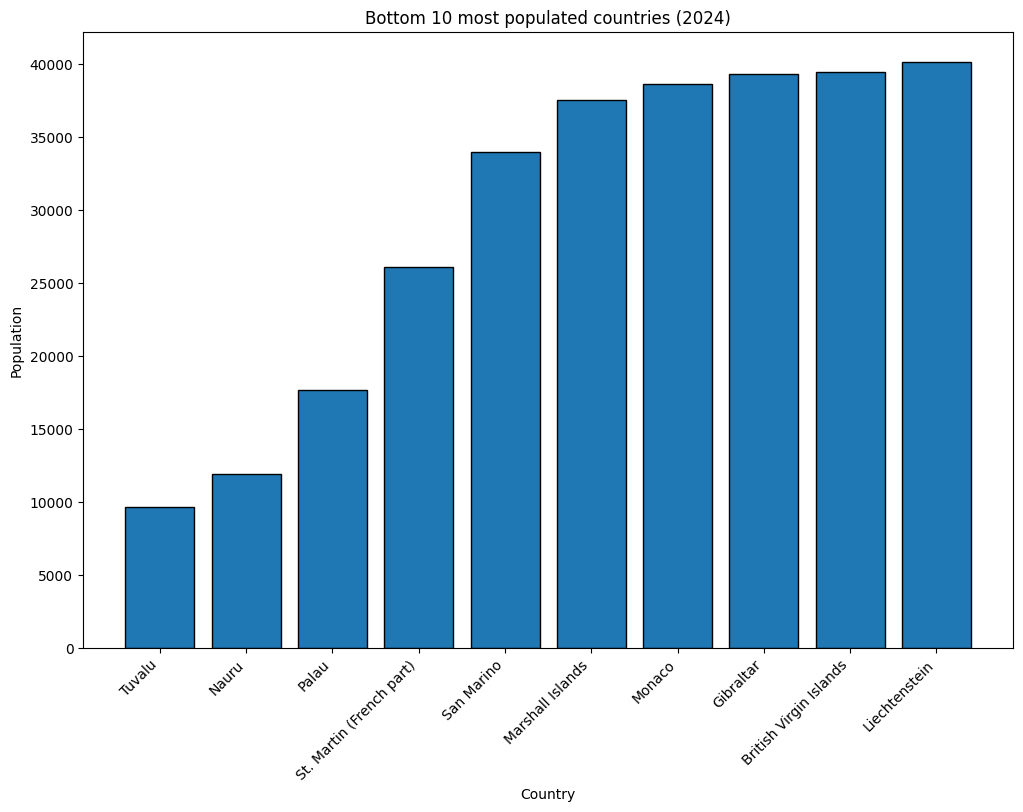

In [35]:
bottom10_by_population=filtered_df.sort_values(by=year,ascending=True).head(10)
plt.figure(figsize=((12,8)))
plt.bar(bottom10_by_population['Country Name'],bottom10_by_population['2024'],edgecolor='black')
plt.title('Bottom 10 most populated countries (2024)')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45,ha='right')
plt.show()

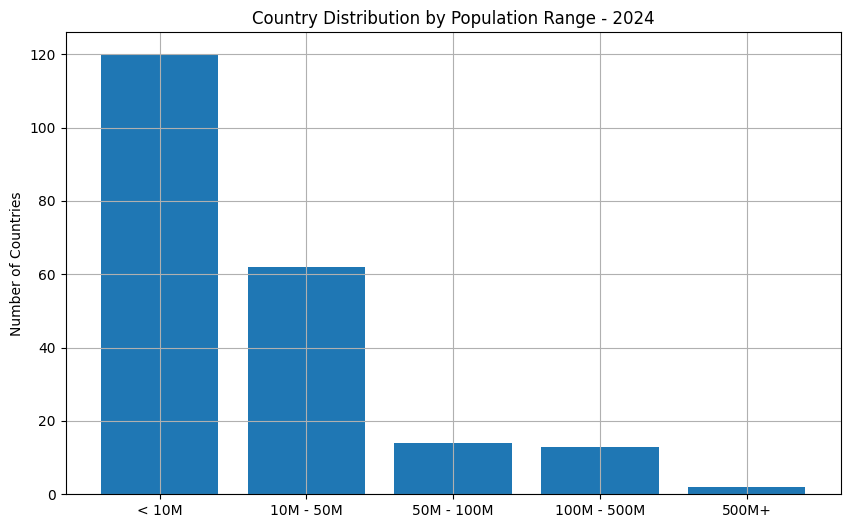

In [58]:
bins=[0,10_000_000, 50_000_000,100_000_000, 500_000_000, 1_500_000_000]
labels=['< 10M','10M - 50M','50M - 100M','100M - 500M','500M+']
df['Population Range']=pd.cut( df[year],bins=bins,labels=labels)
range_counts=df['Population Range'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(range_counts.index.astype(str),range_counts.values)
plt.title('Country Distribution by Population Range - 2024')
plt.ylabel('Number of Countries')
plt.grid()
plt.show()

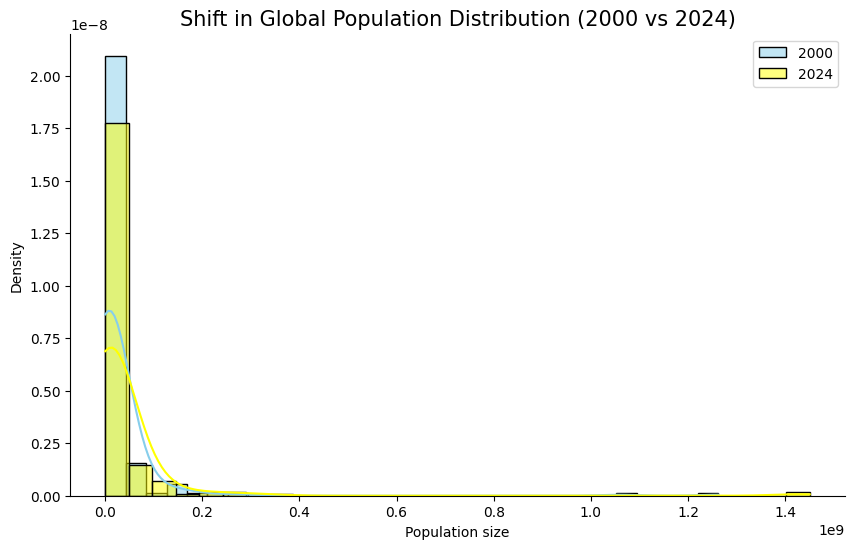

In [37]:
year1="2000"
year2="2024"

data_2000=df[year1].dropna()
data_2024=df[year2].dropna()

plt.figure(figsize=(10,6))
sns.histplot(data_2000,color='skyblue',label='2000',kde=True,stat='density',alpha=0.5)
sns.histplot(data_2024,color='yellow',label='2024',kde=True,stat='density',alpha=0.5)

plt.title('Shift in Global Population Distribution (2000 vs 2024)', fontsize=15)
plt.xlabel('Population size')
plt.legend()
sns.despine()
plt.show()



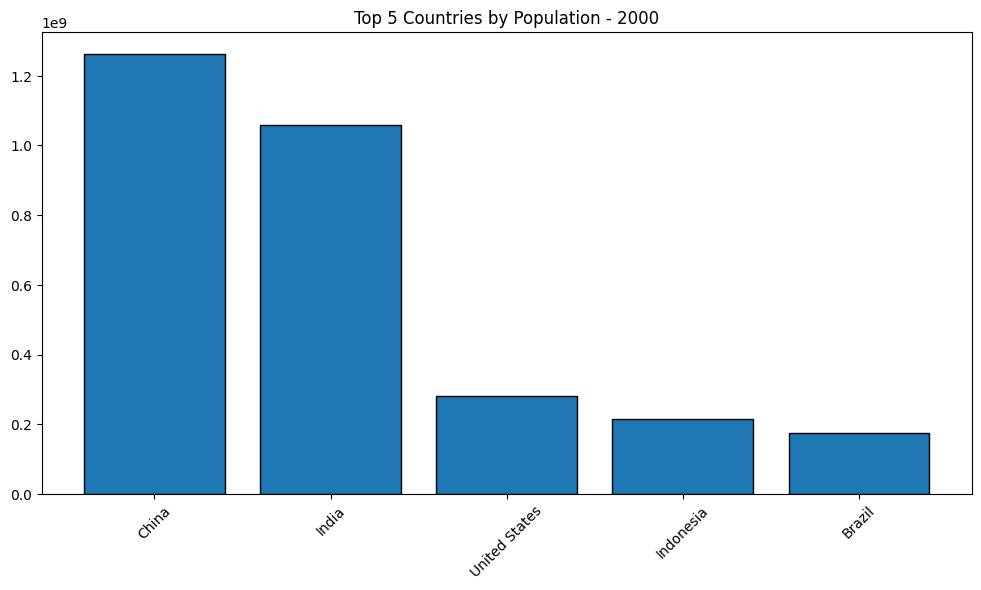

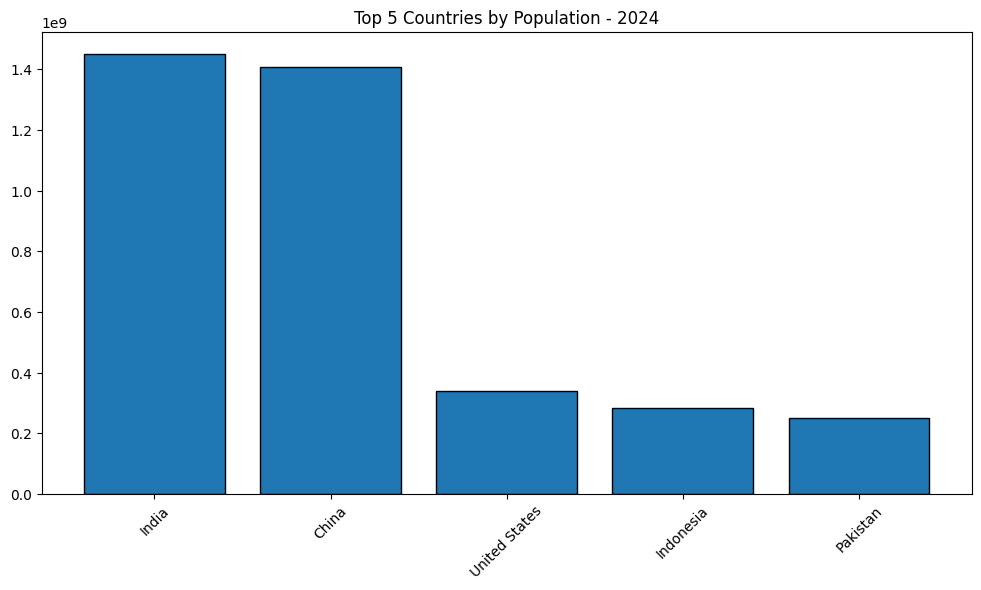

In [42]:
top5_2000=df.sort_values(by=year1, ascending=False).head(5)
top5_2024=df.sort_values(by=year2,ascending=False).head(5)

plt.figure(figsize=(12,6))
plt.bar(top5_2000['Country Name'],top5_2000[year1],edgecolor='black')
plt.title('Top 5 Countries by Population - 2000')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(top5_2024['Country Name'],top5_2024[year2],edgecolor='black')
plt.title('Top 5 Countries by Population - 2024')
plt.xticks(rotation=45)
plt.show()


---

### **Key Insights from Population Analysis**

**1. Global Population Concentration**
Population distribution is highly imbalanced. India (~18.4%) and China (~17.9%) alone account for over one-third of the world’s population. The United States ranks third (~4.3%), while Indonesia and Pakistan collectively contribute ~6.8%.

**2. Asia’s Demographic Dominance**
Asia leads global population rankings, with four countries — India, China, Indonesia, and Pakistan — in the top five most populous nations.

**3. Least Populated Nations**
Countries with the smallest populations include Tuvalu, Nauru, Palau, St. Martin (French Part), and San Marino — mostly island nations or microstates.

**4. Population Range Distribution**

* ~120 countries: < 10M
* 60+: 10–50M
* 15+: 50–100M
* 10+: 100–500M
* 2 countries: 500M+

This shows that most countries have relatively small populations.

**5. Historical Shift in Top Rankings**
Brazil was among the top five in 2000, but by 2024 Pakistan moved into the fifth position, reinforcing Asia’s demographic growth.

---

